In [3]:
!pip install networkx matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 15.1 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 13.6 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 38.2 MB/s eta 0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 12.0 MB/s eta 0:00:00m eta 0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 5.6 MB/s eta 0:00:00


In [20]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
from networkx.drawing.layout import bipartite_layout

In [14]:
ratings = pd.read_csv('100k/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
movies = pd.read_csv('100k/u.item', sep='|', names=['movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL', 
                                                       'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 
                                                       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 
                                                       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], 
                                                       encoding='latin-1')
users = pd.read_csv('100k/u.user', sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])


In [3]:
# Process the data
user_movie_interactions = ratings[['user_id', 'item_id']]

# Create a bipartite graph
B = nx.Graph()
users = user_movie_interactions['user_id'].unique()
movies = user_movie_interactions['item_id'].unique()

B.add_nodes_from(users, bipartite=0, type='user')
B.add_nodes_from(movies, bipartite=1, type='movie')
edges = list(user_movie_interactions.itertuples(index=False, name=None))
B.add_edges_from(edges)

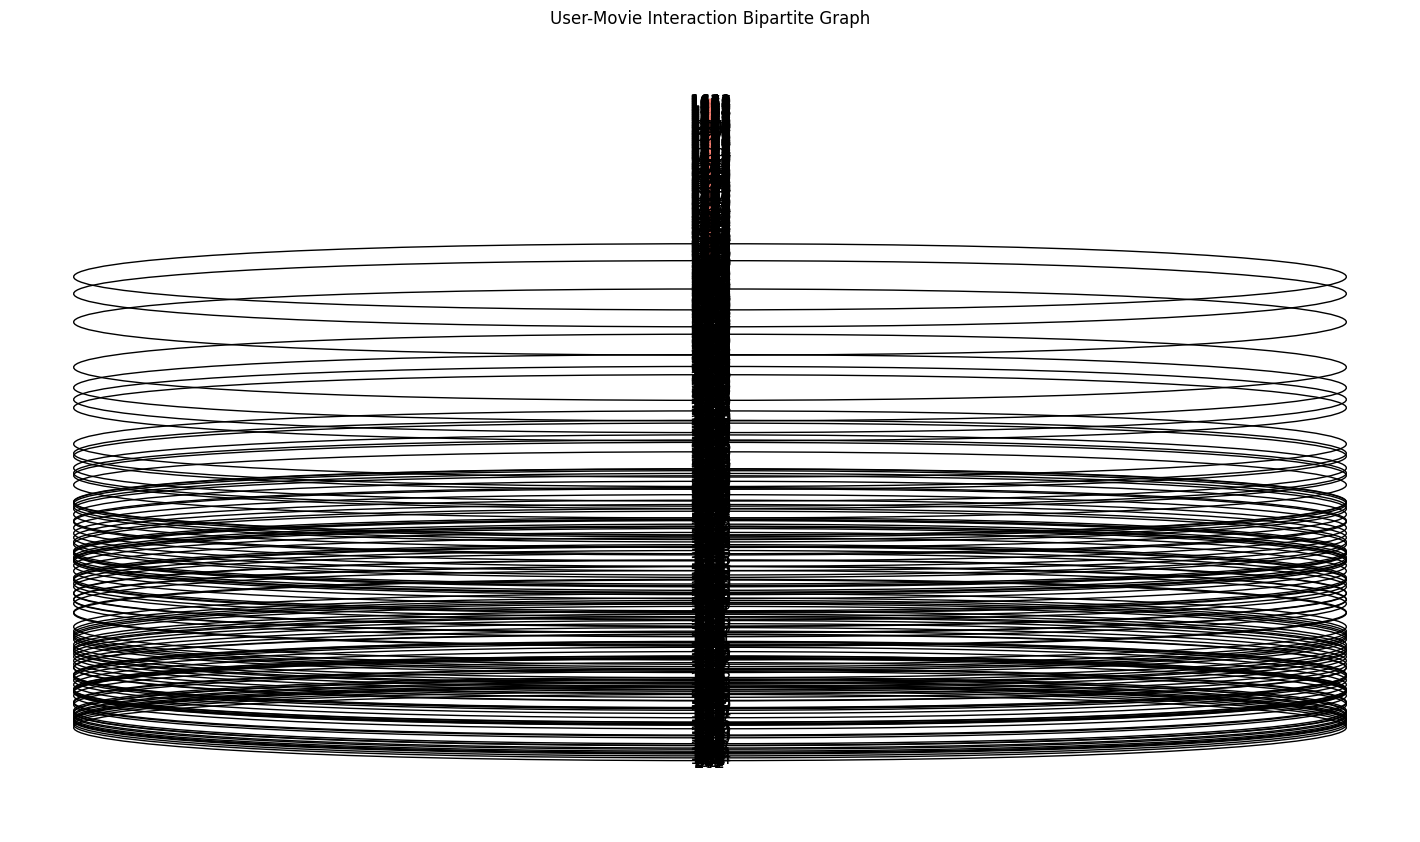

In [4]:
# Visualize the graph
pos = {node: (0, index) for index, node in enumerate(users)}
pos.update({node: (1, index) for index, node in enumerate(movies)})

plt.figure(figsize=(14, 8))
nx.draw(B, pos, with_labels=True, node_size=10, node_color=['skyblue' if B.nodes[node]['type'] == 'user' else 'salmon' for node in B.nodes()])
plt.title('User-Movie Interaction Bipartite Graph')
plt.show()

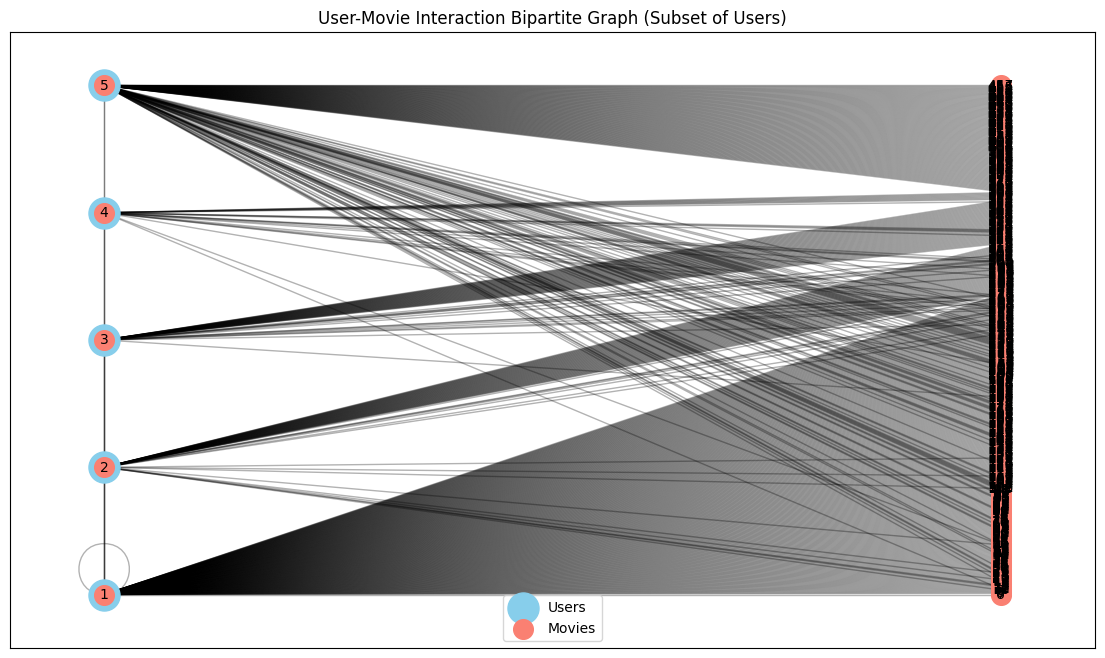

In [24]:
# Select a subset of users
subset_users = list(users['user_id'].unique())[:5]

# Filter the ratings data to include only the subset of users
subset_ratings = ratings[ratings['user_id'].isin(subset_users)]

# Create a bipartite graph
B = nx.Graph()
subset_movies = subset_ratings['item_id'].unique()

B.add_nodes_from(subset_users, bipartite=0, type='user')
B.add_nodes_from(subset_movies, bipartite=1, type='movie')
edges = list(subset_ratings[['user_id', 'item_id']].itertuples(index=False, name=None))
B.add_edges_from(edges)

# Position nodes using bipartite_layout
pos = {node: (0, index) for index, node in enumerate(subset_users)}
pos.update({node: (1, index) for index, node in enumerate(subset_movies)})

# Use the bipartite_layout to position the nodes
pos = bipartite_layout(B, subset_users)

# Draw the graph
plt.figure(figsize=(14, 8))


nx.draw_networkx_nodes(B, pos, nodelist=subset_users, node_color='skyblue', node_size=500, label='Users')
nx.draw_networkx_nodes(B, pos, nodelist=subset_movies, node_color='salmon', node_size=200, label='Movies')
nx.draw_networkx_edges(B, pos, edge_color='black', alpha=0.3)
nx.draw_networkx_labels(B, pos, font_size=10)

plt.title('User-Movie Interaction Bipartite Graph (Subset of Users)')
plt.legend(scatterpoints=1)
plt.show()

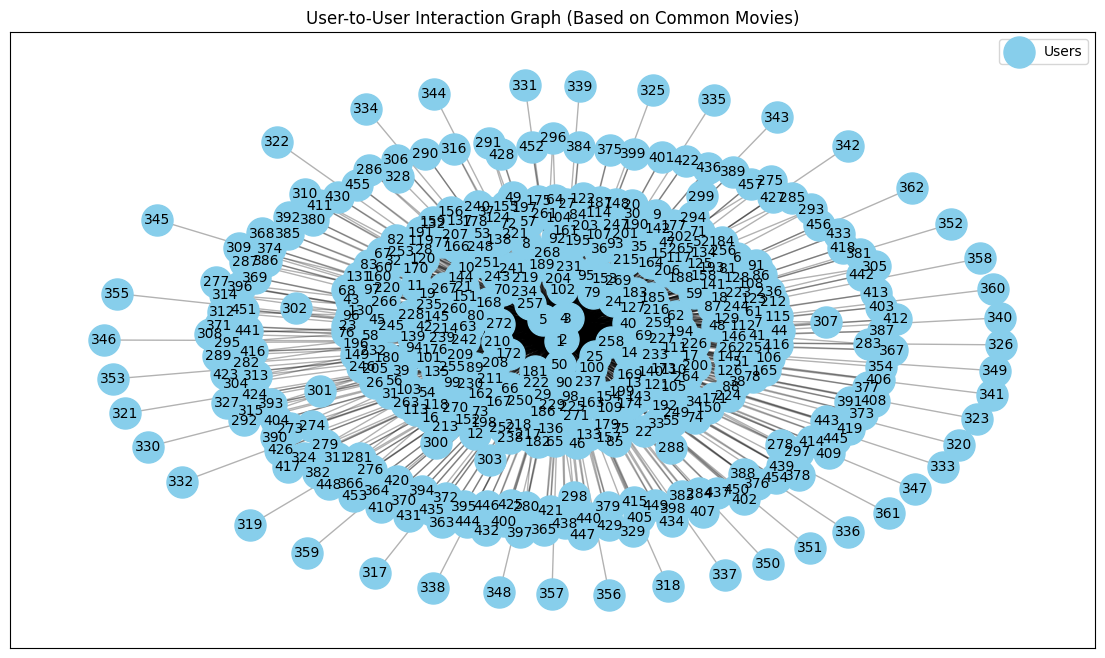

In [25]:
user_user_graph = bipartite.weighted_projected_graph(B, subset_users)

# Draw the user-to-user graph
plt.figure(figsize=(14, 8))
pos_user_user = nx.spring_layout(user_user_graph)

# Draw user nodes
nx.draw_networkx_nodes(user_user_graph, pos_user_user, node_color='skyblue', node_size=500, label='Users')
# Draw edges
nx.draw_networkx_edges(user_user_graph, pos_user_user, edge_color='black', alpha=0.3)
# Add labels
nx.draw_networkx_labels(user_user_graph, pos_user_user, font_size=10)

plt.title('User-to-User Interaction Graph (Based on Common Movies)')
plt.legend(scatterpoints=1)
plt.show()

In [15]:
print(ratings.head())

   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


In [16]:
print(users.head())

   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213


In [17]:
print(movies.head())

   movie_id              title release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            IMDb_URL  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   Adventure  Animation  Children's  ...  Fantasy  Film-Noir  Horror  Musical  \
0          0          1           1  ...        0          0       0        0

In [4]:
#seperate user and movies based on downstream questions to compare LaMP BenchMark, obeserved information of KG 